In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# downloading the data
import os
import urllib.request

download_root = "https://github.com/ageron/data/raw/main/"

datapath = os.path.join("datasets", "lifesat")
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    print(f"Downloading file: {filename}")
    url = download_root + "lifesat/" + filename
    urllib.request.urlretrieve(url, os.path.join(datapath, filename))

In [3]:
# loading the data
oecd_bli = pd.read_csv(os.path.join(datapath, "oecd_bli.csv"))
gdp_per_capita = pd.read_csv(os.path.join(datapath, "gdp_per_capita.csv"))

In [4]:
# printing the first 5 lines of the data in each file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [5]:
gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [6]:
# preparing the data
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [7]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [8]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [9]:
# creating the traing set
Xfull = np.c_[full_country_stats["GDP per capita (USD)"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]

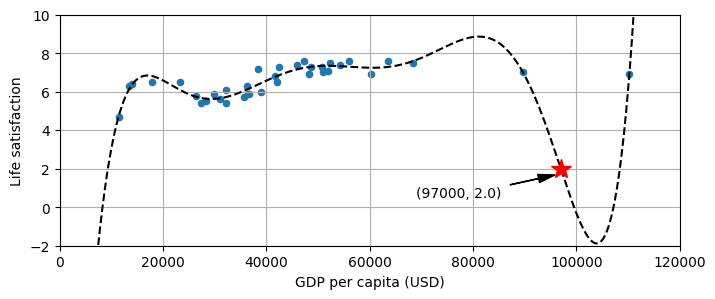

In [10]:
# applying polynomial regression with a polynomial degree 8
poly = PolynomialFeatures(degree=8, include_bias=False) 
scaler = StandardScaler()
model2 = LinearRegression()

pl_reg = Pipeline([('poly', poly), ('scal', scaler), ('lin', model2)])
pl_reg.fit(Xfull, yfull)

full_country_stats.plot(kind="scatter", x="GDP per capita (USD)", 
                        y="Life satisfaction", figsize=(8,3))

plt.axis([0, 120000, -2, 10])

X = np.linspace(0, 120000, 1000)
plt.plot(X, pl_reg.predict(X.reshape(-1,1)), "k--")

# calculating the life satisfaction index (LSI) for a country with GDP equal to 97000.
X0 = 97000
ls_X0 = pl_reg.predict([[X0]])
plt.plot(X0, ls_X0, "r*", markersize = 15)
plt.annotate(f"({X0}, {ls_X0[0][0]:.1f})", xy=(X0, ls_X0-0.25), xytext=(X0-28000, ls_X0-1.5),
             arrowprops=dict(facecolor="black", width=0.25, shrink=0.1, headwidth=6))

plt.grid()
plt.show()

In [11]:
# using the three nearest neighbours to the country with GDP equal to 97000 to estimate its LSI.
X0 = 97000

# finding the three nearest neighbours
X = abs(Xfull - X0)
indices = X.flatten().argsort()

# print the GDP and the life satisfaction index (LSI) of the three nearest neighbours
print("GDP:", Xfull[indices[:3]].flatten())
print("LSI:", yfull[indices[:3]].flatten())

print(f"Predicted LSI: {np.mean(yfull[indices[:3]]):.1f}")

GDP: [ 89688.95695849 110261.1573533   68393.30600395]
LSI: [7.  6.9 7.5]
Predicted LSI: 7.1


By using a polynomial of degree 8 we estimate the LSI of a country with GDP equal to 97000 to be about 2. While by using the LSI of the three nearest neighbours (in terms of GDP) we predict a value of 7.1, which is a reasonable value. This result reveals that the polynomial of degree 8 fits the training data very closely (overfits) but fails to generalize well to areas where there are unknown data points.

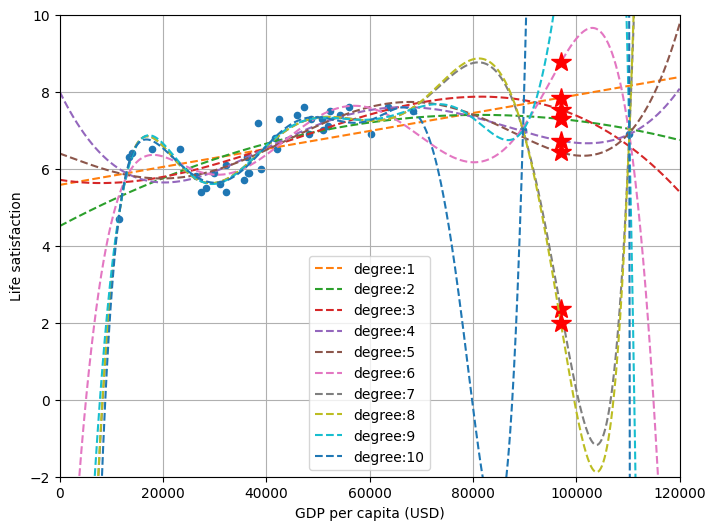

In [12]:
# making predictions by using polynomials with degree from 1 to 10
full_country_stats.plot(kind="scatter", x="GDP per capita (USD)",
                        y="Life satisfaction", figsize=(8,6))

plt.axis([0, 120000, -2, 10])
X = np.linspace(0, 120000, 1000)

for poly_degree in range(1,11):
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False) 
    scaler = StandardScaler()
    model2 = LinearRegression()

    pl_reg = Pipeline([('poly', poly), ('scal', scaler), ('lin', model2)])
    pl_reg.fit(Xfull, yfull)

    plt.plot(X, pl_reg.predict(X.reshape(-1,1)), color = f"C{poly_degree}", 
             ls="--", label=f"degree:{poly_degree}")

    X0 = 97000
    plt.plot(X0, pl_reg.predict([[X0]]), "r*", markersize = 15)

plt.legend()
plt.grid()
plt.show()

By trying several values for the degree of a polynomial we observe that as the degree increases the model overfits the training data and again losses its ability to generalize well to unknown values of the GDP. This means that the model becomes less reliable in predicting life satisfaction for countries with GDP values that were not included in the training data. Therefore, it is important to find an appropriate balance in choosing the degree of the polynomial to prevent overfitting and ensure better generalization to unseen data.